<a href="https://colab.research.google.com/github/kleczekr/tensorflow/blob/master/violence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/My Drive/ethnic_violence/globalterrorismdb_0919dist.xlsx')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 197.2+ MB


In [7]:
# What are the types of data in each column?
# converting to string to avoid truncating the series
print(df.dtypes.to_string())

eventid                        int64
iyear                          int64
imonth                         int64
iday                           int64
approxdate                    object
extended                       int64
resolution            datetime64[ns]
country                        int64
country_txt                   object
region                         int64
region_txt                    object
provstate                     object
city                          object
latitude                     float64
longitude                    float64
specificity                  float64
vicinity                       int64
location                      object
summary                       object
crit1                          int64
crit2                          int64
crit3                          int64
doubtterr                      int64
alternative                  float64
alternative_txt               object
multiple                       int64
success                        int64
s

In [8]:
# How many incidents are listed for each country covered by the data?
# converting to string to avoid truncation
print(df.country_txt.value_counts().to_string())

Iraq                                26057
Pakistan                            14847
Afghanistan                         14509
India                               12853
Colombia                             8515
Philippines                          7509
Peru                                 6108
United Kingdom                       5335
El Salvador                          5320
Somalia                              4674
Nigeria                              4556
Turkey                               4391
Thailand                             4032
Yemen                                3673
Spain                                3251
Sri Lanka                            3029
United States                        2926
Algeria                              2749
France                               2706
Egypt                                2534
West Bank and Gaza Strip             2512
Lebanon                              2486
Syria                                2438
Libya                             

In [9]:
# It seems that bulk of the data is from Asian countries
# Let's group it by regions
print(df.region_txt.value_counts().to_string())

Middle East & North Africa     53110
South Asia                     48266
Sub-Saharan Africa             19752
South America                  19292
Western Europe                 16843
Southeast Asia                 13363
Central America & Caribbean    10359
Eastern Europe                  5217
North America                   3579
East Asia                        808
Central Asia                     571
Australasia & Oceania            304


In [10]:
# Let's try to normalize these counts:
df.region_txt.value_counts(normalize=True)

Middle East & North Africa     0.277389
South Asia                     0.252089
Sub-Saharan Africa             0.103163
South America                  0.100760
Western Europe                 0.087970
Southeast Asia                 0.069794
Central America & Caribbean    0.054104
Eastern Europe                 0.027248
North America                  0.018693
East Asia                      0.004220
Central Asia                   0.002982
Australasia & Oceania          0.001588
Name: region_txt, dtype: float64

In [11]:
# It seems that over half of the incidents listed is from Middle East, North
# Africa and South Asia.
# Let's do crosstab on the intersection of country by attack type:
# (in order to avoid truncating, I set the 'max_rows' parameter to 500)
pd.set_option('display.max_rows', 500)
pd.crosstab(df.country_txt, df.attacktype1_txt)

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country_txt,,,,,,,,,
Afghanistan,3264,1067,6784,397,21,42,1185,78,1671
Albania,11,14,48,1,0,0,2,2,2
Algeria,915,431,1093,53,9,4,97,1,146
Andorra,1,0,0,0,0,0,0,0,0
Angola,124,28,256,19,0,1,28,1,42
Antigua and Barbuda,0,0,0,1,0,0,0,0,0
Argentina,88,137,458,39,1,5,72,7,13
Armenia,4,6,11,1,1,1,1,0,0
Australia,16,10,39,39,0,3,0,4,6


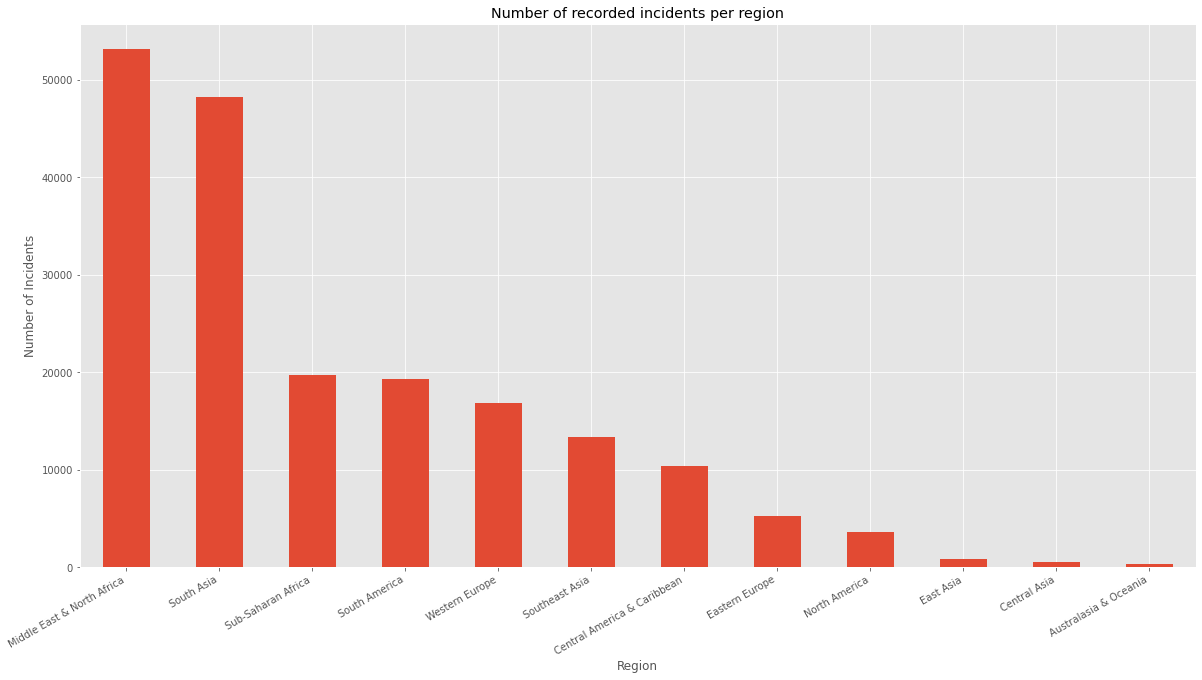

In [12]:
# Let's try a simple barplot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style


df.region_txt.value_counts().plot(kind='bar', figsize=(20, 10))

plt.title('Number of recorded incidents per region')
plt.ylabel('Number of Incidents')
plt.xlabel('Region')
# to tilt the bottom labels:
plt.xticks(rotation=30, ha='right')
plt.show()